In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

This experinments need to run seperate for each laughter per dataset sampling approach

In [2]:
variedinputCSV = '/Users/mingshi/Desktop/DissertationProject/Week12/final-merge-all-varied-first-pass.csv'
constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'
data = pd.read_csv(variedinputCSV)

In [3]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'

nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

responseList = set(data['concise merge type'].tolist())
responseList
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
y_indepdent_CV_LIST_unique = list(set(y_indepdent_list))

featurelist = get_featureList_index()

X_feature = data[featurelist]

X_acuostic_feature_numpy_array = X_feature.values

In [9]:
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'

discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'


utteranceType =     mirthfulLaugh
print("Current laughter is" + utteranceType)
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]

classNameLaughter

# Process the 'considetype' column
laughter_name_inLoop = utteranceType

X_feature_temp = X_feature
X_acuostic_feature_numpy_array = X_feature_temp.values

y_indepdent_list = y_indepdent.tolist()
# This operation make only current laughter type is 1 other type is 0
# Convert target to binary: 1 for 'mirthful', 0 for others


y_binaryOperation_Series = data[conside_column_name].apply(lambda x: 1 if x == laughter_name_inLoop else 0)
y_binaryOperation_list = y_binaryOperation_Series.tolist()

# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X_acuostic_feature_numpy_array, y_binaryOperation_list,
                                                        test_size=0.3, random_state=42)

Current laughter is[laugh]-Mirthful


# Adopt linear regression to identify which features are significant in explaining the variance in the concise merge type(response variable).

In [10]:
#
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = featurelist
X_feature_temp.fillna(0, inplace=True)
# Step 1: Find out what matters
X_with_const = sm.add_constant(X_feature_temp)  # Adding a constant for the intercept
model = sm.OLS(y_binaryOperation_list, X_with_const).fit()  # Fit a linear model

p_values = model.pvalues

# Record significant features based on p-value < 0.05
significant_features = p_values[p_values < 0.05]
series_significant_dict = significant_features.to_dict()
linear_df = pd.DataFrame(series_significant_dict, index=[0]) .T
prefixInfo = varidDurationPrefix
topNSaveName = prefixInfo+utteranceType+'-LinearRegression-Significant-Feature.csv'
linear_df.to_csv(topNSaveName, index=True)

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_3869/2261521789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature_temp.fillna(0, inplace=True)


In [11]:

feature_sign_df = pd.read_csv(topNSaveName, header=None, index_col=False)
feature_sign_df.drop(index=feature_sign_df.index[0], axis=0, inplace=True)
first_column_str_list = feature_sign_df.iloc[:, 0].astype(str).tolist()
low_levelacusoticFeatureList = [s.split('_', 1)[0] for s in first_column_str_list]


# Change duration name here 

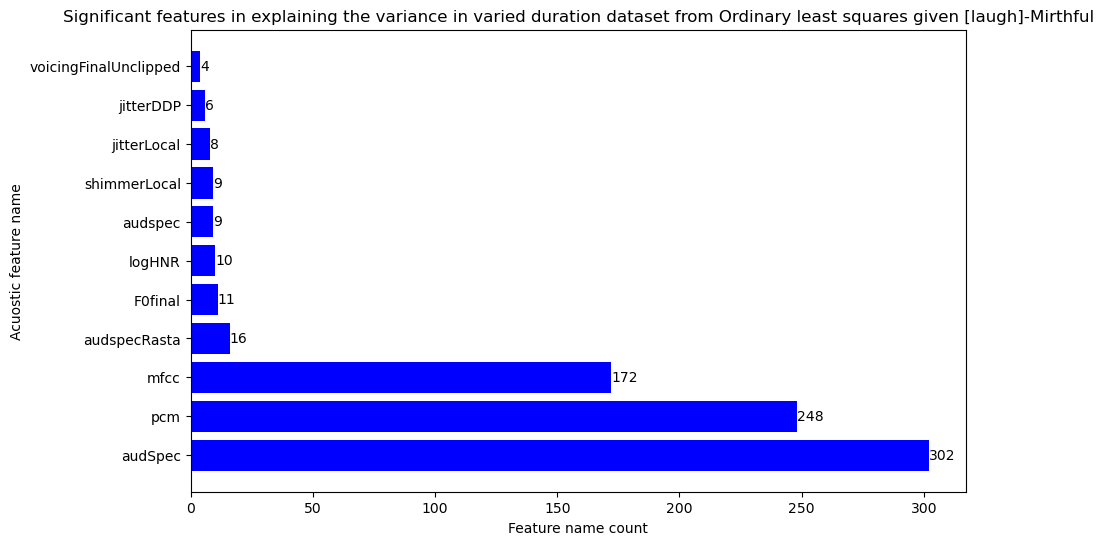

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Counting occurrences of each value
counts = Counter(low_levelacusoticFeatureList)

# Sorting items for better visualization (optional)
sorted_items = counts.most_common()

# Separating names and counts
names, values = zip(*sorted_items)

# Creating horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(names, values, color='blue')

# Removing grid
plt.grid(False)

# Adding numbers on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             va='center', ha='left')

plt.ylabel('Acuostic feature name')  # Adjusting labels for the horizontal orientation
plt.xlabel('Feature name count')
durationName = 'varied duration dataset'
titleInput  = 'Significant features in explaining the variance in '+durationName +' from Ordinary least squares ' +'given '+utteranceType
plt.title(titleInput)

saveNameImportance = prefixInfo+utteranceType+ '-signficantFeature-Name-Regression.png'
# Save the plot as an image
plt.savefig(saveNameImportance)

plt.show()